# Data Wrangling

In [12]:
import mysql.connector as connection
import numpy as np
import pandas as pd

In [13]:
mydb = connection.connect(host='ttfprojectdb.cdjjwxlk5ujc.eu-central-1.rds.amazonaws.com',
                        database='database-data-science-project-its-ttf-2022-23',
                        user='edoardo',
                        password='PG8Io90EcKBVEg2iKLgi')

In [14]:
query_metro_parcheggi = "Select * from Acessi_metro_e_parcheggi_per_metro_parigi;"
df_metro_parcheggi = pd.read_sql(query_metro_parcheggi,mydb)

query_parcheggi_su_strada_e_diritti_di_passaggio_parigi = "select * from parcheggi_su_strada_e_diritti_di_passaggio_parigi"
df_parcheggi_su_strada_parigi = pd.read_sql(query_parcheggi_su_strada_e_diritti_di_passaggio_parigi,mydb)

query_piste_ciclabili_e_percorsi_degli_autobus_parigi = "select * from piste_ciclabili_e_percorsi_degli_autobus_parigi"
df_piste_cic_percorsi_autobus = pd.read_sql(query_piste_ciclabili_e_percorsi_degli_autobus_parigi,mydb)

query_scuole_elementari_parigi = "select * from scuole_elementari_parigi"
df_elementari_parigi = pd.read_sql(query_scuole_elementari_parigi,mydb)

query_scuole_materne_asili_parigi = "select * from scuole_materne_asili"
df_scuole_materne_asili_parigi = pd.read_sql(query_scuole_materne_asili_parigi,mydb)

query_strade_e_trasporti_parigi = "select * from strade_e_trasporti_parigi "
df_stra_trasporti_parigi = pd.read_sql(query_strade_e_trasporti_parigi,mydb)

query_stazioni_servizio_parigi = "select * from stazioni_servizio_veicoli_parigi"
df_staz_servizio_parigi = pd.read_sql(query_stazioni_servizio_parigi,mydb)

query_Taxi_parigi = "select * from Taxi_parigi"
df_taxi_parigi = pd.read_sql(query_Taxi_parigi,mydb)

query_terreni_costruibili_e_non_parigi = "select * from terreni_costruibili_e_non_costruibili_parigi"
df_terreni_parigi = pd.read_sql(query_terreni_costruibili_e_non_parigi,mydb)

### Prep the data for the clustering

#### parcheggi metro

In [15]:
df_metro_parcheggi_parigi_mod = df_metro_parcheggi['geo_point_2d'].str.split(',', expand=True)
df_metro_parcheggi_parigi_mod = df_metro_parcheggi_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_metro_parcheggi_parigi_mod['Type'] = 'Parcheggi metro'

#### parcheggi su strada

In [16]:
df_parcheggi_su_strada_parigi_mod = df_parcheggi_su_strada_parigi['geo_point_2d'].str.split(',', expand=True)
df_parcheggi_su_strada_parigi_mod = df_parcheggi_su_strada_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_parcheggi_su_strada_parigi_mod['Type'] = 'Parcheggi pubblici'


In [17]:
df_parcheggi_su_strada_parigi_mod = df_parcheggi_su_strada_parigi_mod.head(2000)
df_parcheggi_su_strada_parigi_mod

,Ylocation,Xlocation,Type
0,48.880812316279005,2.295395371621856,Parcheggi pubblici
1,48.83843975615369,2.262354304067086,Parcheggi pubblici
2,48.842839963092466,2.2629408705404503,Parcheggi pubblici
3,48.85672360876848,2.4116595498993307,Parcheggi pubblici
4,48.830840017932864,2.3063979507810113,Parcheggi pubblici
...,...,...,...
1995,48.84441096224479,2.3091876748773594,Parcheggi pubblici
1996,48.84409672531001,2.307800327389737,Parcheggi pubblici
1997,48.87525397979889,2.3185301659705555,Parcheggi pubblici
1998,48.865249012870564,2.275012129477651,Parcheggi pubblici


#### piste ciclabili e percorsi autobus

In [18]:
df_piste_cic_percorsi_autobus_mod = df_piste_cic_percorsi_autobus['geo_point_2d'].str.split(',', expand=True)
df_piste_cic_percorsi_autobus_mod = df_piste_cic_percorsi_autobus_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_piste_cic_percorsi_autobus_mod['Type'] = 'Piste ciclabili / Percorsi autobus'


In [19]:
df_piste_cic_percorsi_autobus_mod = df_piste_cic_percorsi_autobus_mod.head(2000)

#### scuole elementari

In [20]:
df_elementari_parigi_mod = df_elementari_parigi['geo_point_2d'].str.split(',', expand=True)
df_elementari_parigi_mod = df_elementari_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_elementari_parigi_mod['Type'] = 'Scuole elementari'
df_elementari_parigi_mod

,Ylocation,Xlocation,Type
0,48.88356786525452,2.3190758116218957,Scuole elementari
1,48.843060086859566,2.307804978548764,Scuole elementari
2,,None,Scuole elementari
3,,None,Scuole elementari
4,,None,Scuole elementari
...,...,...,...
2731,48.82704302623386,2.3313944907390955,Scuole elementari
2732,48.886139831007554,2.362362546664067,Scuole elementari
2733,48.89718583356112,2.318108225674163,Scuole elementari
2734,48.86944406393216,2.3771085387812607,Scuole elementari


#### scuole materne

In [21]:
df_scuole_materne_asili_parig_mod = df_scuole_materne_asili_parigi['geo_point_2d'].str.split(',', expand=True)
df_scuole_materne_asili_parig_mod = df_scuole_materne_asili_parig_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_scuole_materne_asili_parig_mod['Type'] = 'Scuole materne e asili'
df_scuole_materne_asili_parig_mod

,Ylocation,Xlocation,Type
0,48.88984387655997,2.374063531123014,Scuole materne e asili
1,48.84308546115557,2.3748081429127215,Scuole materne e asili
2,48.82888285397241,2.3661723561209267,Scuole materne e asili
3,48.88929068174652,2.2975159879426785,Scuole materne e asili
4,48.88227003037333,2.393072678029631,Scuole materne e asili
...,...,...,...
3074,48.844262130266365,2.265610562451197,Scuole materne e asili
3075,48.840497261500985,2.386879521782013,Scuole materne e asili
3076,48.871835907064614,2.3204375509403414,Scuole materne e asili
3077,48.853123576113504,2.4020317188117035,Scuole materne e asili


#### strade trasporti

In [22]:
df_stra_trasporti_parigi_mod = df_stra_trasporti_parigi['geo_point_2d'].str.split(',', expand=True)
df_stra_trasporti_parigi_mod = df_stra_trasporti_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_stra_trasporti_parigi_mod['Type'] = 'Strade trasporti' 

In [23]:
df_stra_trasporti_parigi_mod = df_stra_trasporti_parigi_mod.head(2000)

#### stazioni servizio

In [24]:
df_staz_servizio_parigi_mod = df_staz_servizio_parigi['geo_point_2d'].str.split(',', expand=True)
df_staz_servizio_parigi_mod = df_staz_servizio_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_staz_servizio_parigi_mod['Type'] = 'Stazioni di servizio'

#### taxi

In [25]:
df_taxi_parigi_mod = df_taxi_parigi['geo_point_2d'].str.split(',', expand=True)
df_taxi_parigi_mod = df_taxi_parigi_mod.rename(columns={0: 'Ylocation', 1: 'Xlocation'})
df_taxi_parigi_mod['Type'] = 'Taxi'

#### terreni parigi

In [26]:
df_terreni_parigi_cnat = df_terreni_parigi.drop(['ID', 'OBJECTID', 'X','Y', 'geo_point_2d'], axis=1)
#Replace column value
df_terreni_parigi_cnat = df_terreni_parigi_cnat.replace(['B','N','I'],['Terreno costruito','Terreno non costruito','Terreno sconosciuto'])
df_terreni_parigi_cnat = df_terreni_parigi_cnat.rename(columns={'C_NAT': 'Type'})

In [27]:
df_terreni_parigi_geo = df_terreni_parigi['geo_point_2d'].str.split(',', expand=True)
df_terreni_parigi_geo = df_terreni_parigi_geo.rename(columns={0: 'Ylocation', 1: 'Xlocation'})

In [28]:
df_terreni_parigi_cnat.insert(0, 'ID', range(0, 0 + len(df_terreni_parigi_cnat)))
df_terreni_parigi_geo.insert(0, 'ID', range(0, 0 + len(df_terreni_parigi_geo)))

In [29]:
df_terreni_parigi_mod = pd.merge(df_terreni_parigi_geo,df_terreni_parigi_cnat)
df_terreni_parigi_mod = df_terreni_parigi_mod.drop(['ID'], axis=1)

In [30]:
df_terreni_parigi_mod = df_terreni_parigi_mod.head(2000)

### unisco i vari df in un unico dataframe

In [31]:
df_parigi = df_metro_parcheggi_parigi_mod.append(df_parcheggi_su_strada_parigi_mod)

In [32]:
df_parigi = df_parigi.append(df_piste_cic_percorsi_autobus_mod)

In [33]:
df_parigi = df_parigi.append(df_scuole_materne_asili_parig_mod)

In [34]:
df_parigi = df_parigi.append(df_elementari_parigi_mod)

In [35]:
df_parigi = df_parigi.append(df_stra_trasporti_parigi_mod)

In [36]:
df_parigi = df_parigi.append(df_staz_servizio_parigi_mod)

In [37]:
df_parigi = df_parigi.append(df_taxi_parigi_mod)

In [38]:
df_parigi = df_parigi.append(df_terreni_parigi_mod)

## Encoding

### Cambio tipo cordinate str-->float
#### ma prima controllo e elimino eventuali null

In [39]:
df_parigi.isna().sum()

Ylocation       0
Xlocation    1241
Type            0
dtype: int64

In [40]:
df_parigi = df_parigi.dropna()

In [41]:
df_parigi.isna().sum()

Ylocation    0
Xlocation    0
Type         0
dtype: int64

In [42]:
df_parigi['Xlocation'] = df_parigi['Xlocation'].astype(float)
df_parigi['Ylocation'] = df_parigi['Ylocation'].astype(float)

In [43]:
df_parigi = df_parigi[df_parigi.Xlocation != '']

In [44]:
df_parigi_encoded = pd.get_dummies(df_parigi, columns = ['Type'])
df_parigi_encoded

,Ylocation,Xlocation,Type_Parcheggi metro,Type_Parcheggi pubblici,Type_Piste ciclabili / Percorsi autobus,Type_Scuole elementari,Type_Scuole materne e asili,Type_Stazioni di servizio,Type_Strade trasporti,Type_Taxi,Type_Terreno costruito,Type_Terreno non costruito,Type_Terreno sconosciuto
0,48.828160,2.327310,1,0,0,0,0,0,0,0,0,0,0
1,48.826412,2.357024,1,0,0,0,0,0,0,0,0,0,0
2,48.847590,2.257893,1,0,0,0,0,0,0,0,0,0,0
3,48.881618,2.370279,1,0,0,0,0,0,0,0,0,0,0
4,48.851109,2.333279,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,48.854813,2.360318,0,0,0,0,0,0,0,0,0,1,0
1996,48.857136,2.354777,0,0,0,0,0,0,0,0,1,0,0
1997,48.846268,2.323121,0,0,0,0,0,0,0,0,0,1,0
1998,48.857915,2.392794,0,0,0,0,0,0,0,0,1,0,0


# Data Modelling: Hierachical clustering

In [45]:
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

## Elbow method to decide on the number of clusters

Dataset toppo grande, non gli bastano 8 GB di RAM

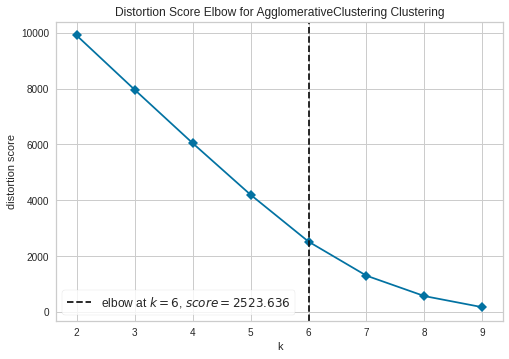

In [46]:
model = AgglomerativeClustering()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)
# Fit data to visualizer
visualizer.fit(df_parigi_encoded)
# Finalize and render figure
visualizer.show()

## Making Prediction

In [48]:
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 6)
# Fit and predict on the data
y_hc = hc.fit_predict(df_parigi_encoded)
# Save the predictions as a column
df_parigi['Cluster'] = y_hc
# Check the distribution
df_parigi['Cluster'].value_counts()

0    3604
4    2580
2    2000
3    2000
1    2000
5    1995
Name: Cluster, dtype: int64

In [63]:
df_parigi.to_csv('Parigi_cluster.csv', encoding='utf-8')